In [47]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np

In [6]:
start = datetime.datetime(1950, 1 , 3)
end = datetime.datetime(2019, 3, 22)

print(start, end)

1950-01-03 00:00:00 2019-03-22 00:00:00


In [35]:
gspc_df = pd.read_csv('yahp.csv')
gspc_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-Mar-19,"2,819.72","2,860.31","2,817.38","2,854.88","2,854.88","3,546,800,000"
1,20-Mar-19,"2,831.34","2,843.54","2,812.43","2,824.23","2,824.23","3,771,200,000"
2,19-Mar-19,"2,840.76","2,852.42","2,823.27","2,832.57","2,832.57","3,620,220,000"
3,18-Mar-19,"2,822.61","2,835.41","2,821.99","2,832.94","2,832.94","3,552,190,000"
4,15-Mar-19,"2,810.79","2,830.73","2,810.79","2,822.48","2,822.48","5,962,730,000"
...,...,...,...,...,...,...,...
17411,9-Jan-50,17.08,17.08,17.08,17.08,17.08,"2,520,000"
17412,6-Jan-50,16.98,16.98,16.98,16.98,16.98,"2,010,000"
17413,5-Jan-50,16.93,16.93,16.93,16.93,16.93,"2,550,000"
17414,4-Jan-50,16.85,16.85,16.85,16.85,16.85,"1,890,000"


In [10]:
gspc_df['Date'] = pd.to_datetime(gspc_df['Date'])

In [36]:
gspc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-Mar-19,"2,819.72","2,860.31","2,817.38","2,854.88","2,854.88","3,546,800,000"
1,20-Mar-19,"2,831.34","2,843.54","2,812.43","2,824.23","2,824.23","3,771,200,000"
2,19-Mar-19,"2,840.76","2,852.42","2,823.27","2,832.57","2,832.57","3,620,220,000"
3,18-Mar-19,"2,822.61","2,835.41","2,821.99","2,832.94","2,832.94","3,552,190,000"
4,15-Mar-19,"2,810.79","2,830.73","2,810.79","2,822.48","2,822.48","5,962,730,000"


In [13]:
cpi_df = pd.read_csv('CPIAUCNS.csv')
cpi_df.columns = ['Date', 'CPI']

cpi_df

,Date,CPI
0,1/1/1913,9.800
1,2/1/1913,9.800
2,3/1/1913,9.800
3,4/1/1913,9.800
4,5/1/1913,9.700
...,...,...
1269,10/1/2018,252.885
1270,11/1/2018,252.038
1271,12/1/2018,251.233
1272,1/1/2019,251.712


In [14]:
print ('gspc_df.shape():', gspc_df.shape)
print ('cpi_df.shape():', cpi_df.shape)


gspc_df.shape(): (17416, 7)
cpi_df.shape(): (1274, 2)


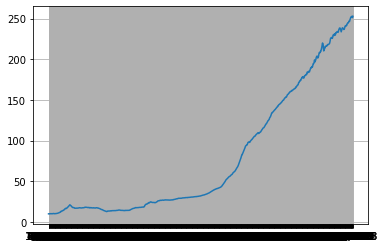

In [16]:
plt.plot(cpi_df['Date'], cpi_df['CPI'])
plt.grid()
plt.show()

<ipython-input-25-3d921cbd2ae3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])


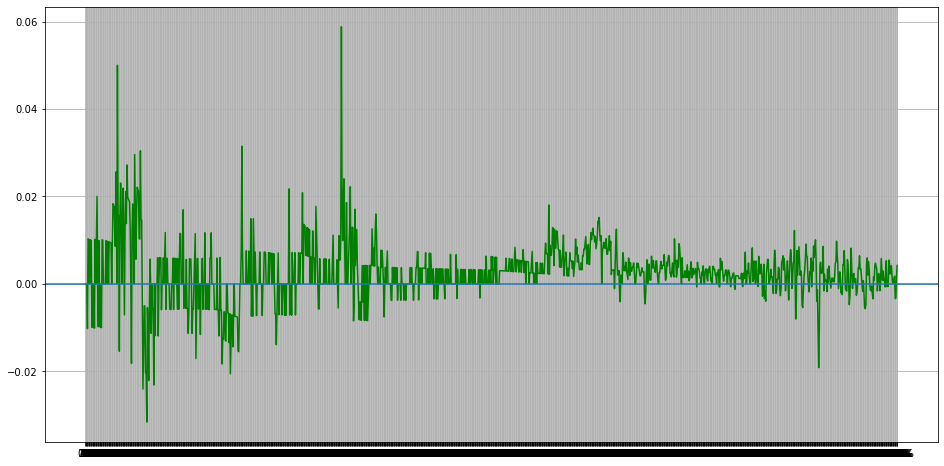

In [25]:
# CPI Percentage Change

fig, ax = plt.subplots(figsize = (16,8))
cpi_df['CPI_pct_change'] = cpi_df['CPI'].pct_change().copy()
plt.plot(cpi_df['Date'], cpi_df['CPI_pct_change'], c = 'green')
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.grid()
plt.axhline(0)
plt.show()

#how can i get the year?

In [26]:
#stats

cpi_df['CPI'].describe()

count    1274.000000
mean       78.601381
std        76.635686
min         9.700000
25%        17.400000
50%        31.900000
75%       140.800000
max       252.885000
Name: CPI, dtype: float64

### join both data now

In [44]:
# join the data sets

print ('gspc_df.shape():', gspc_df.shape)
print ('cpi_df.shape():', cpi_df.shape)
together = pd.merge(gspc_df[['Date', 'Adj Close']],
                    cpi_df[['Date', 'CPI', 'CPI_pct_change']],
                   on = ['Date'], how= 'left')

#fill the data

together = together.fillna(method = 'ffill')
together.columns = ['Date', 'GSPC_Close', 'CPI', 'CPI_pct_change']

##drop the data

together = together.dropna(axis=0)
together.tail(20)

gspc_df.shape(): (17416, 7)
cpi_df.shape(): (1274, 3)


,Date,GSPC_Close,CPI,CPI_pct_change


In [43]:
together.tail(20)

,Date,GSPC_Close,CPI,CPI_pct_change


In [40]:
# base CPI as of today
ref_price = 252.776

together['GSPC_Close_CPI_Adj'] = (together['GSPC_Close'] /
                                  together['CPI']) * ref_price
together.tail()

,Date,GSPC_Close,CPI,CPI_pct_change,GSPC_Close_CPI_Adj


In [57]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

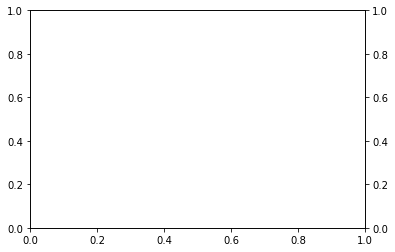

In [59]:
x = together.index
y1 = together['GSPC_Close']
y2 = together['CPI_pct_change']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ValueError: 'vals' is not a valid value for axis; supported values are 'x', 'y', 'both'

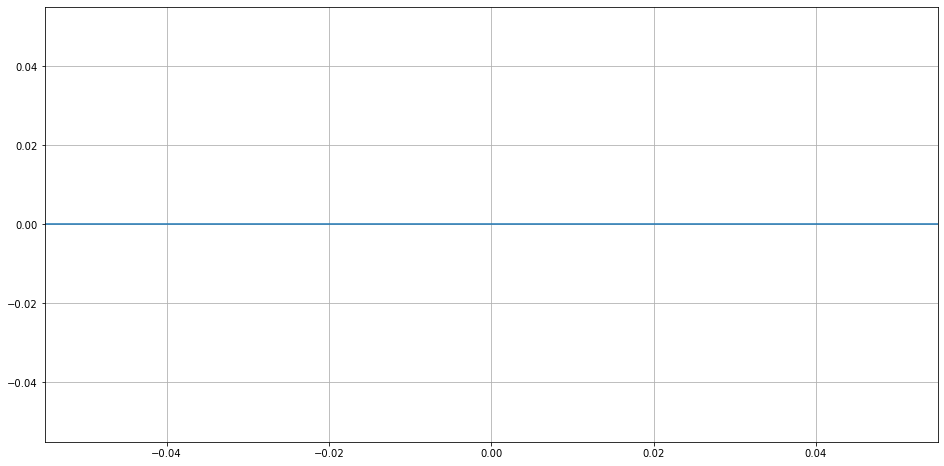

In [55]:
# join datasets

fig, ax = plt.subplots(figsize = (16,8))
plt.plot(together['Date'],
        together['CPI_pct_change'].rolling(window = 100).mean())
         
plt.grid()
plt.axhline(0)
ax.tick_params('vals', colors='r')

